# 🐱 CatBoost Algorithm -- CatBoostClassifier
---
## Notebook prepared by Muhammad Anas


## Definition
CatBoost is a gradient boosting algorithm designed to handle categorical features efficiently and produce high-accuracy models for classification and regression tasks.

### Types of CatBoost
1. CatBoostClassifier: Used for classification tasks.
2. CatBoostRegressor: Used for regression tasks.


In [17]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [8]:
#loading the dataset
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
#checking for missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#checking for the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#splitting the dataset into features and target variable
X=data.drop('species',axis=1)
y=data['species']

In [12]:
#splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#model training
categorical_features = list(X_train.select_dtypes(include=["object", "category"]).columns)

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=False
)

model.fit(
    X_train,
    y_train,
    cat_features=categorical_features
)


In [14]:
#making predictions
y_pred = model.predict(X_test)
y_pred

array([['versicolor'],
       ['setosa'],
       ['virginica'],
       ['versicolor'],
       ['versicolor'],
       ['setosa'],
       ['versicolor'],
       ['virginica'],
       ['versicolor'],
       ['versicolor'],
       ['virginica'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['virginica'],
       ['versicolor'],
       ['versicolor'],
       ['virginica'],
       ['setosa'],
       ['virginica'],
       ['setosa'],
       ['virginica'],
       ['virginica'],
       ['virginica'],
       ['virginica'],
       ['virginica'],
       ['setosa'],
       ['setosa']], dtype=object)

In [18]:
#evaluating the model
accuarcy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuarcy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



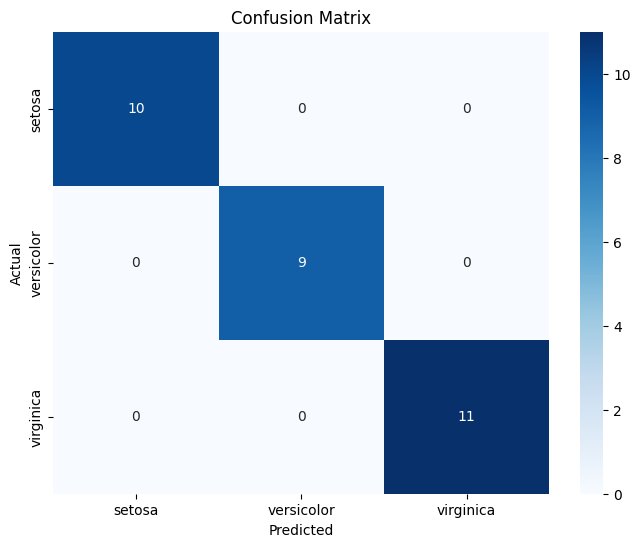

In [19]:
#drawing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()